<h1 style="color: #FF8C00;">Portfolio Analysis: Python Challenge</h1>

---

**This challenge** represents a practical tech assignment designed to test your skills in portfolio analysis. 

Portfolio analysis is a systematic way to evaluate investment portfolios to optimize asset allocation and management. It involves a variety of financial metrics and visualizations to assess the performance and risk of different financial assets.

- In this exercise, you will be required to perform a series of calculations and create visualizations to analyze a set of financial assets.
- Your task is to develop the necessary code to accomplish each of these tasks effectively.
- This challenge is an opportunity to demonstrate your ability to apply Python programming skills in a real-world financial context.

<h1 style="color: #FF8C00;">Libraries</h1>

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1 style="color: #FF8C00;">Exercise 1: Data Loading and Price Charting</h1>

---

You are tasked with loading and analyzing financial data, which is foundational for effective portfolio management. Begin by loading the file named `asset_price_data.csv`, containing essential pricing information for various financial assets.

Post data loading, your objective is to visualize this data through a time series graph.The integrity of your analysis depends heavily on your ability to visualize trends accurately while ensuring all asset price series begin at a uniform value.

In [2]:
file_path = "asset_price_data.csv"
df = pd.read_csv(file_path)

In [3]:
df.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,231.5061,55.875,25.649222,302.93,50.89
1,2019-01-03,231.0356,54.977,25.503047,302.11,50.41
2,2019-01-04,230.4026,56.129,26.147133,301.77,51.38
3,2019-01-07,230.0543,56.838,25.955277,302.33,52.14
4,2019-01-08,229.7012,56.895,26.137997,303.42,52.13


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  770 non-null    float64
 2   Asset2  770 non-null    float64
 3   Asset3  770 non-null    float64
 4   Asset4  734 non-null    float64
 5   Asset5  763 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [5]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

In [6]:
normalized_df = df / df.iloc[0]
normalized_df

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-02,1.000000,1.000000,1.000000,1.000000,1.000000
2019-01-03,0.997968,0.983928,0.994301,0.997293,0.990568
2019-01-04,0.995233,1.004546,1.019412,0.996171,1.009629
2019-01-07,0.993729,1.017235,1.011932,0.998019,1.024563
2019-01-08,0.992204,1.018255,1.019056,1.001618,1.024366
...,...,...,...,...,...
2021-12-27,1.079543,1.860510,1.513496,NaN,1.377677
2021-12-28,1.079612,1.870711,1.524997,NaN,1.376105
2021-12-29,1.074363,1.867740,1.514861,1.130492,1.371782


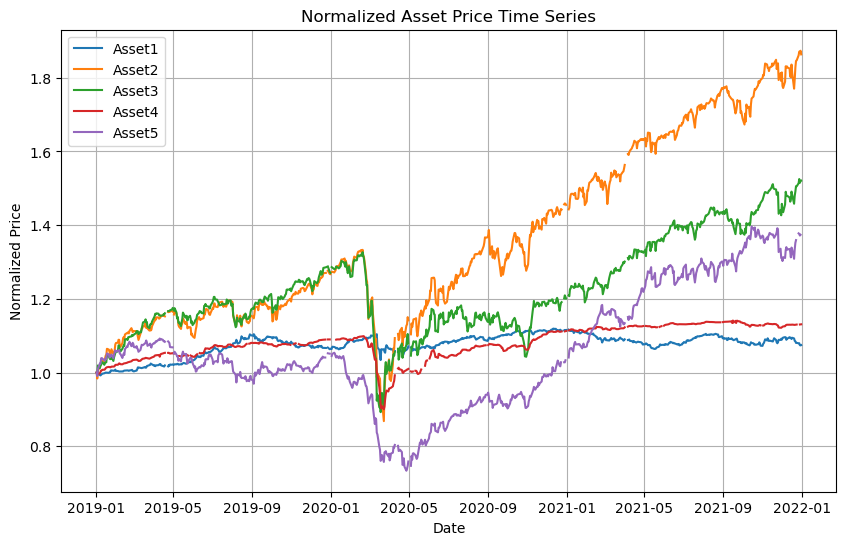

In [7]:
plt.figure(figsize=(10, 6))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], label=column)

plt.title("Normalized Asset Price Time Series")
plt.xlabel("Date")
plt.ylabel("Normalized Price")
plt.legend()
plt.grid(True)
plt.show()

<h1 style="color: #FF8C00;">Exercise 2: Daily Percentage Returns</h1>

---

You are required to calculate the daily percentage returns for each financial asset. Utilize this data to accomplish the following:
- Calculate the correlation matrix for the five assets.
- Create a scatter plot comparing the returns of two specific assets.

<h2 style="color: #FF6347;">Daily Returns Calculation.</h2>

In [41]:
daily_returns = df.pct_change(fill_method=None).dropna()
daily_returns.head()

,Asset1,Asset2,Asset3,Asset4,Asset5
date,,,,,
2019-01-03,-0.002032,-0.016072,-0.005699,-0.002707,-0.009432
2019-01-04,-0.002740,0.020954,0.025255,-0.001125,0.019242
2019-01-07,-0.001512,0.012632,-0.007338,0.001856,0.014792
2019-01-08,-0.001535,0.001003,0.007040,0.003605,-0.000192
2019-01-09,0.001976,0.012919,0.002272,0.004120,0.014003


\text{Daily Return}_t = \frac{P_t - P_{t-1}}{P_{t-1}}

<h2 style="color: #FF6347;">Correlation Matrix Calculation.</h2>

In [9]:
corr_matrix = daily_returns.corr()
corr_matrix

,Asset1,Asset2,Asset3,Asset4,Asset5
Asset1,1.000000,-0.088341,-0.061253,0.102252,-0.106484
Asset2,-0.088341,1.000000,0.852491,0.526634,0.591399
Asset3,-0.061253,0.852491,1.000000,0.511550,0.557414
Asset4,0.102252,0.526634,0.511550,1.000000,0.421155
Asset5,-0.106484,0.591399,0.557414,0.421155,1.000000


In [10]:
print(corr_matrix.round(4))

        Asset1  Asset2  Asset3  Asset4  Asset5
Asset1  1.0000 -0.0883 -0.0613  0.1023 -0.1065
Asset2 -0.0883  1.0000  0.8525  0.5266  0.5914
Asset3 -0.0613  0.8525  1.0000  0.5115  0.5574
Asset4  0.1023  0.5266  0.5115  1.0000  0.4212
Asset5 -0.1065  0.5914  0.5574  0.4212  1.0000


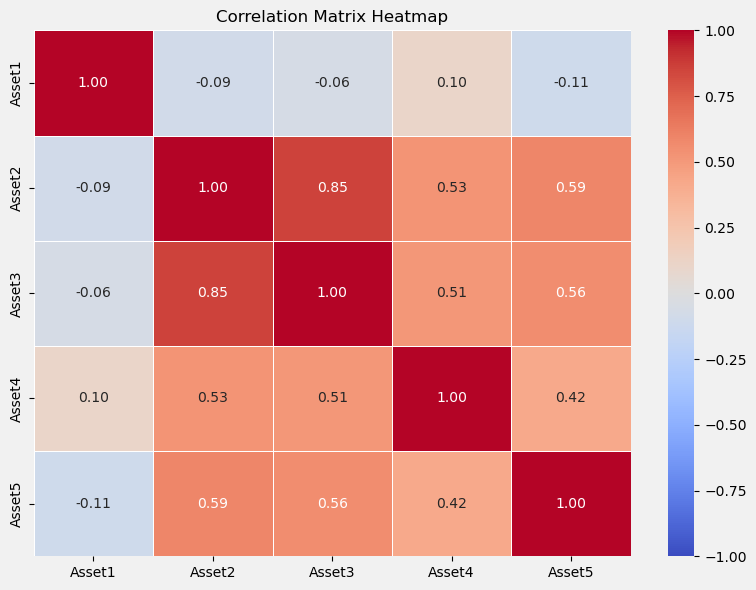

In [50]:
fig, ax = plt.subplots(figsize=(8, 6), facecolor="#f1f1f1")
ax.set_facecolor("#f1f1f1")
sns.heatmap(
    corr_matrix,
    annot=True,         
    fmt=".2f",          
    cmap="coolwarm",    
    vmin=-1, vmax=1,     
    linewidths=0.5
)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

Asset1 provides strong diversification benefits due to its low correlation with other assets.
Holding large positions in both Asset2 and Asset3 offers limited diversification benefits.
Asset4 can contribute to returns while maintaining moderate diversification.
Asset5 enhances portfolio diversification by reducing dependence on traditional assets.

<h2 style="color: #FF6347;">Scatter Plot between the Returns of Two Assets.</h2>

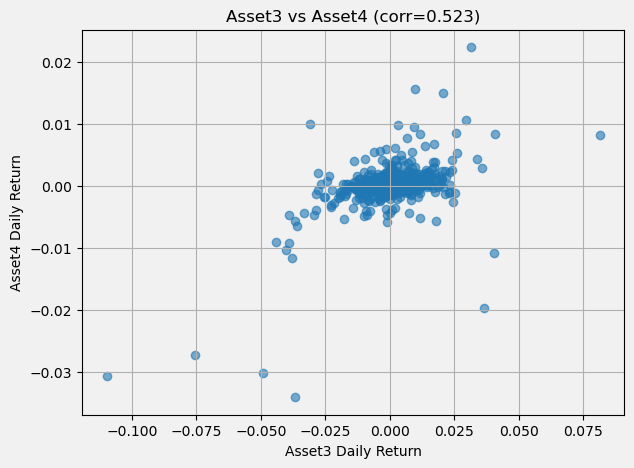

In [51]:
corr_xy = daily_returns[[asset_x, asset_y]].corr().iloc[0, 1]

fig, ax = plt.subplots(figsize=(7, 5), facecolor="#f1f1f1")
ax.set_facecolor("#f1f1f1")
plt.scatter(daily_returns[asset_x], daily_returns[asset_y], alpha=0.6)
plt.title(f"{asset_x} vs {asset_y} (corr={corr_xy:.3f})")
plt.xlabel(f"{asset_x} Daily Return")
plt.ylabel(f"{asset_y} Daily Return")
plt.grid(True)
plt.show()

The scatter plot shows a positive but imperfect relationship between Asset3 and Asset4, consistent with their moderate correlation. While the two assets tend to move in the same direction, the dispersion of points indicates potential diversification benefits.

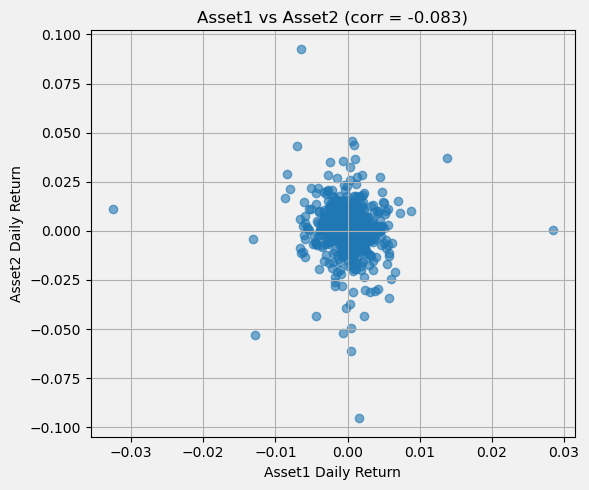

In [52]:
x = daily_returns["Asset1"]
y = daily_returns["Asset2"]

corr = x.corr(y)

fig, ax = plt.subplots(figsize=(6, 5), facecolor="#f1f1f1")
ax.set_facecolor("#f1f1f1")
plt.scatter(x, y, alpha=0.6)
plt.xlabel("Asset1 Daily Return")
plt.ylabel("Asset2 Daily Return")
plt.title(f"Asset1 vs Asset2 (corr = {corr:.3f})")
plt.grid(True)
plt.tight_layout()
plt.show()

The scatter plot shows no clear linear relationship between Asset1 and Asset2, consistent with their near-zero correlation. This indicates strong diversification benefits when combining the two assets in a portfolio.

<h1 style="color: #FF8C00;">Exercise 3: Portfolio Analysis</h1>

---

This third exercise focuses on calculating and analyzing the performance of a portfolio. Begin by loading the file named `portfolio_weights.csv`, which contains the daily weights of each asset in the portfolio.

To complete the exercise, you will need to perform the following tasks:
- Create an area chart of the asset weights.
- Plot the historical cumulative returns of the portfolio.
- Calculate the annualized return of the portfolio.
- Determine the annualized volatility of the portfolio (using an annualization factor of 261 days).
- Produce an area chart grouping asset weights by their categories, as detailed in the `asset_information_data.csv`.

<h2 style="color: #FF6347;">Area Chart of Asset Weights.</h2>

In [13]:
weights_path = "portfolio_weights.csv"
weights = pd.read_csv(weights_path)

In [14]:
weights.head()

,date,Asset1,Asset2,Asset3,Asset4,Asset5
0,2019-01-02,0.225458,0.116255,0.265003,0.23031,0.162974
1,2019-01-03,0.225458,0.116255,0.265003,0.23031,0.162974
2,2019-01-04,0.225458,0.116255,0.265003,0.23031,0.162974
3,2019-01-07,0.225458,0.116255,0.265003,0.23031,0.162974
4,2019-01-08,0.225458,0.116255,0.265003,0.23031,0.162974


In [15]:
weights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    783 non-null    object 
 1   Asset1  783 non-null    float64
 2   Asset2  783 non-null    float64
 3   Asset3  783 non-null    float64
 4   Asset4  783 non-null    float64
 5   Asset5  783 non-null    float64
dtypes: float64(5), object(1)
memory usage: 36.8+ KB


In [16]:
weights["date"] = pd.to_datetime(weights["date"])
weights = weights.set_index("date")

In [17]:
common_assets = [c for c in daily_returns.columns if c in weights.columns]
daily_returns = daily_returns[common_assets]
weights = weights[common_assets]

In [18]:
daily_returns, weights = daily_returns.align(weights, join="inner", axis=0)

In [ ]:
weights_sum = weights.sum(axis=1)
print("Weights sum check (min, max):", weights_sum.min(), weights_sum.max())

Weights sum check (min, max): 0.9999999999999999 1.0


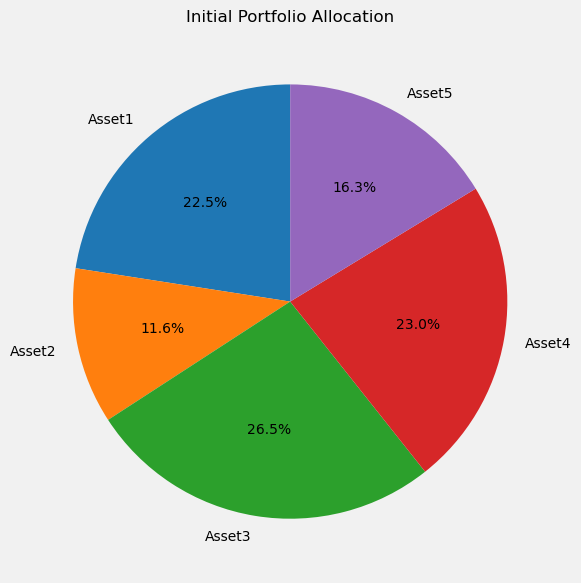

In [48]:
initial_weights = weights.iloc[0]

fig, ax = plt.subplots(figsize=(6, 6), facecolor="#f1f1f1")
ax.set_facecolor("#f1f1f1")

ax.pie(
    initial_weights,
    labels=initial_weights.index,
    autopct="%.1f%%",
    startangle=90
)

ax.set_title("Initial Portfolio Allocation")
plt.tight_layout()
plt.show()

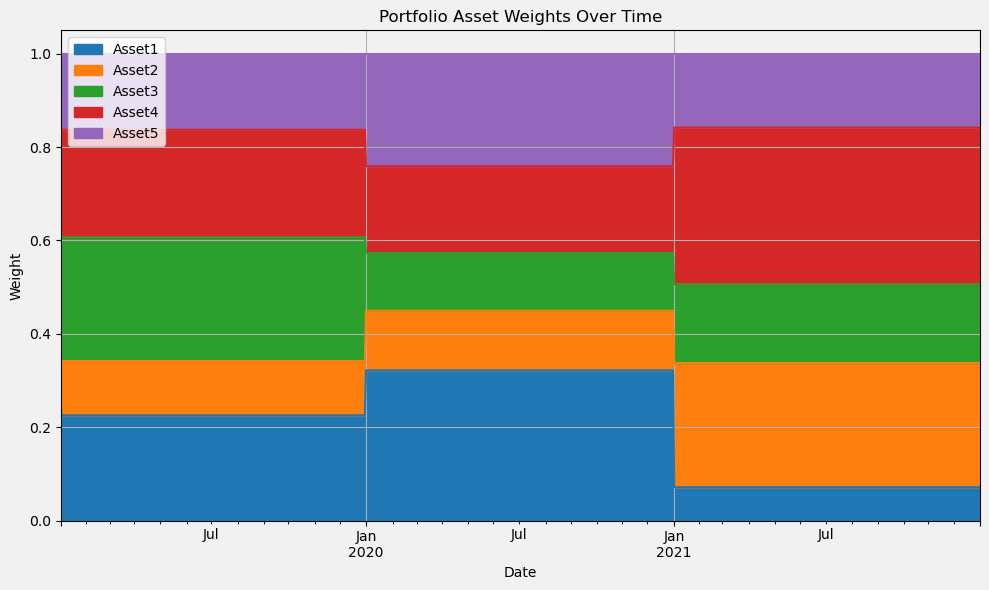

In [49]:
fig, ax = plt.subplots(figsize=(10, 6), facecolor="#f1f1f1")
ax.set_facecolor("#f1f1f1")

weights.plot.area(ax=ax)

ax.set_title("Portfolio Asset Weights Over Time")
ax.set_xlabel("Date")
ax.set_ylabel("Weight")
ax.legend(loc="upper left")
ax.grid(True)

plt.tight_layout()
plt.show()

The area chart illustrates how the portfolio allocation evolves over time, with stepwise changes indicating periodic rebalancing. The shifts in weights reflect changes in risk exposure across different market conditions.

<h2 style="color: #FF6347;">Chart of Historical Cumulative Returns of the Portfolio.</h2>

In [21]:
portfolio_daily_return = (weights * daily_returns).sum(axis=1)

In [22]:
portfolio_cum_return = (1 + portfolio_daily_return).cumprod() - 1

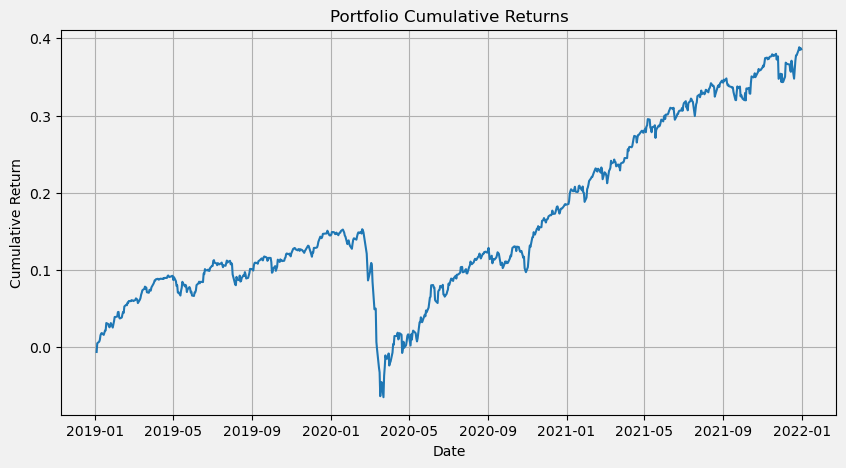

In [53]:
fig, ax = plt.subplots(figsize=(10, 5), facecolor="#f1f1f1")
ax.set_facecolor("#f1f1f1")
plt.plot(portfolio_cum_return.index, portfolio_cum_return.values)
plt.title("Portfolio Cumulative Returns")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.grid(True)
plt.show()

The cumulative return plot shows that the portfolio achieved strong long-term growth despite experiencing a significant drawdown in early 2020. The subsequent recovery and continued upward trend suggest that the diversified and periodically rebalanced portfolio was resilient to market shocks.

<h2 style="color: #FF6347;">Annualized Return.</h2>

In [24]:
annualization_factor = 261
n_days = portfolio_daily_return.shape[0]

total_return = (1 + portfolio_daily_return).prod() - 1
annualized_return = (1 + total_return) ** (annualization_factor / n_days) - 1

print(f"Annualized Return (Geometric, 261 days): {annualized_return:.4%}")


Annualized Return (Geometric, 261 days): 11.5026%


<h2 style="color: #FF6347;">Annualized Volatility.</h2>

In [25]:
annualized_volatility = portfolio_daily_return.std() * np.sqrt(annualization_factor)
print(f"Annualized Volatility (261 days): {annualized_volatility:.4%}")

Annualized Volatility (261 days): 8.5126%


The portfolio achieves an annualized return of approximately 11.5% with an annualized volatility of about 8.5%, indicating a favorable risk–return profile over the sample period.

<h2 style="color: #FF6347;">Area Chart of Asset Weights Grouped by Family.</h2>

In [ ]:
info_path = "asset_information_data.csv"
asset_info = pd.read_csv(info_path)

In [27]:
name_col = "Name"
family_col = "Family"
asset_to_family = dict(zip(asset_info[name_col], asset_info[family_col]))

In [28]:
families = [asset_to_family.get(asset, "Unknown") for asset in weights.columns]

In [45]:
weights_by_family = weights.copy()
weights_by_family.columns = families
weights_by_family = weights_by_family.T.groupby(level=0).sum().T

<Figure size 1000x600 with 0 Axes>

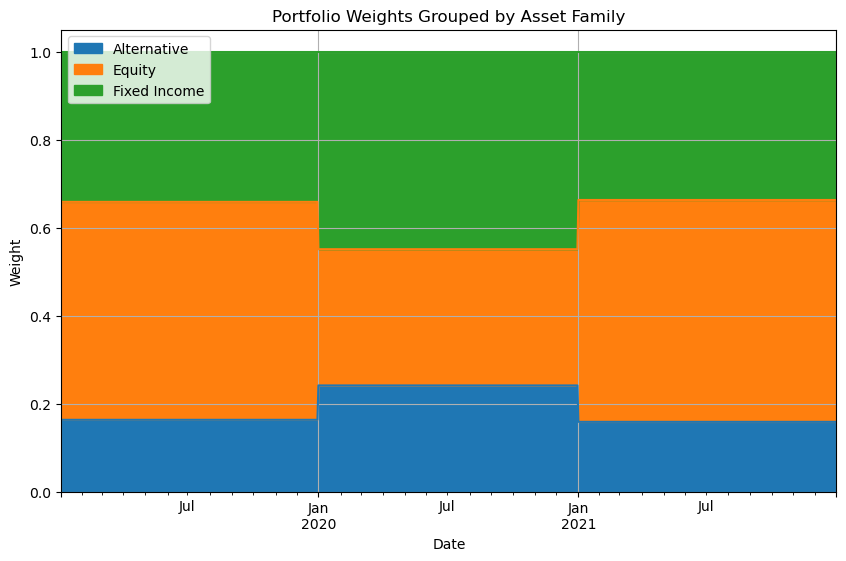

In [46]:
plt.figure(figsize=(10, 6))
weights_by_family.plot.area(figsize=(10, 6))
plt.title("Portfolio Weights Grouped by Asset Family")
plt.xlabel("Date")
plt.ylabel("Weight")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

The area chart shows that portfolio allocations are adjusted annually across asset families, reflecting a strategic asset allocation approach with shifts toward defensive assets in periods of higher uncertainty.

Conclusion

This portfolio analysis demonstrates that a diversified and strategically rebalanced portfolio can achieve strong long-term performance while maintaining controlled risk. Over the sample period, the portfolio delivers a positive cumulative return, with an annualized return of approximately 11.5% and a moderate annualized volatility of around 8.5%. Although the portfolio experiences a significant drawdown during periods of market stress, it recovers relatively quickly, highlighting the benefits of diversification across asset classes. The area charts further show that annual rebalancing across asset families helps manage risk exposure over time, supporting the effectiveness of a long-term strategic asset allocation approach.

In [31]:
annual_factor = 261

asset_annual_return = daily_returns.mean() * annual_factor
asset_annual_vol = daily_returns.std() * np.sqrt(annual_factor)

risk_return_df = pd.DataFrame({
    "Annual Return": asset_annual_return,
    "Annual Volatility": asset_annual_vol
})

risk_return_df

,Annual Return,Annual Volatility
Asset1,0.025152,0.048304
Asset2,0.226657,0.193938
Asset3,0.157905,0.188591
Asset4,0.042515,0.053642
Asset5,0.117667,0.152430


In [32]:
portfolio_annual_return = annualized_return
portfolio_annual_vol = annualized_volatility

portfolio_annual_return, portfolio_annual_vol

(np.float64(0.11502594642639608), np.float64(0.08512646107451317))

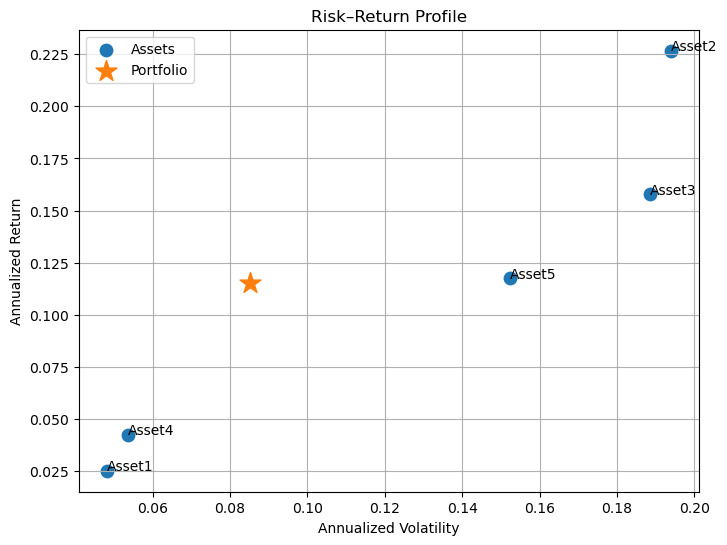

In [33]:
plt.figure(figsize=(8, 6))

# 单个资产
plt.scatter(
    risk_return_df["Annual Volatility"],
    risk_return_df["Annual Return"],
    s=80,
    label="Assets"
)

for asset in risk_return_df.index:
    plt.text(
        risk_return_df.loc[asset, "Annual Volatility"],
        risk_return_df.loc[asset, "Annual Return"],
        asset
    )

# 当前组合
plt.scatter(
    portfolio_annual_vol,
    portfolio_annual_return,
    marker="*",
    s=250,
    label="Portfolio"
)

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Risk–Return Profile")
plt.legend()
plt.grid(True)
plt.show()

In [34]:
final_weights = weights.iloc[-1]

final_weights

Asset1    0.071307
Asset2    0.266093
Asset3    0.168775
Asset4    0.335470
Asset5    0.158356
Name: 2021-12-31 00:00:00, dtype: float64

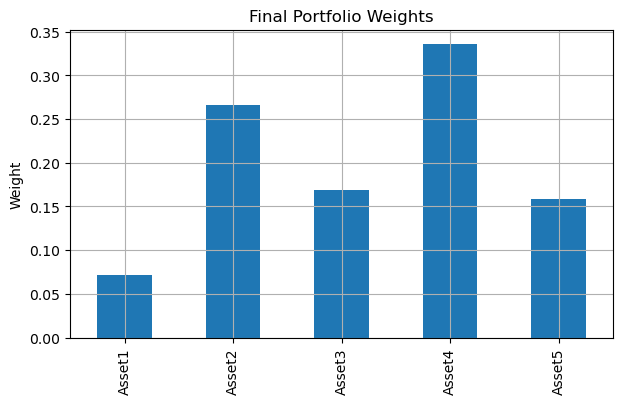

In [35]:
final_weights.plot(kind="bar", figsize=(7, 4))
plt.title("Final Portfolio Weights")
plt.ylabel("Weight")
plt.grid(True)
plt.show()

In [36]:
mean_returns = daily_returns.mean() * annual_factor
cov_matrix = daily_returns.cov() * annual_factor

In [37]:
num_portfolios = 10000

results = []
weights_list = []

np.random.seed(42)

for _ in range(num_portfolios):
    w = np.random.random(len(mean_returns))
    w /= np.sum(w)

    port_return = np.dot(w, mean_returns)
    port_vol = np.sqrt(np.dot(w.T, np.dot(cov_matrix, w)))

    results.append([port_vol, port_return])
    weights_list.append(w)

results_df = pd.DataFrame(
    results,
    columns=["Volatility", "Return"]
)

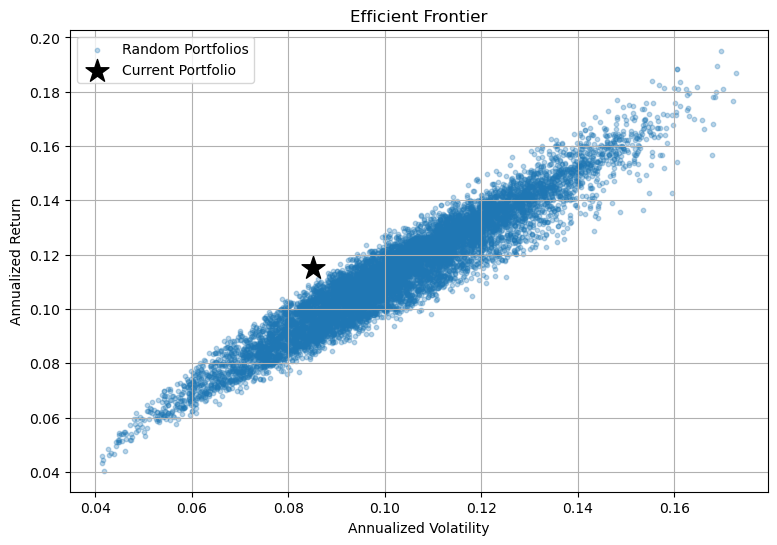

In [38]:
plt.figure(figsize=(9, 6))

plt.scatter(
    results_df["Volatility"],
    results_df["Return"],
    alpha=0.3,
    s=10,
    label="Random Portfolios"
)

# 当前组合
plt.scatter(
    portfolio_annual_vol,
    portfolio_annual_return,
    marker="*",
    color="black",
    s=300,
    label="Current Portfolio"
)

plt.xlabel("Annualized Volatility")
plt.ylabel("Annualized Return")
plt.title("Efficient Frontier")
plt.legend()
plt.grid(True)
plt.show()

In [39]:
risk_free_rate = 0.0

results_df["Sharpe"] = (
    results_df["Return"] - risk_free_rate
) / results_df["Volatility"]

max_sharpe_idx = results_df["Sharpe"].idxmax()
max_sharpe_port = results_df.loc[max_sharpe_idx]

max_sharpe_port

Volatility    0.067467
Return        0.089440
Sharpe        1.325693
Name: 9976, dtype: float64

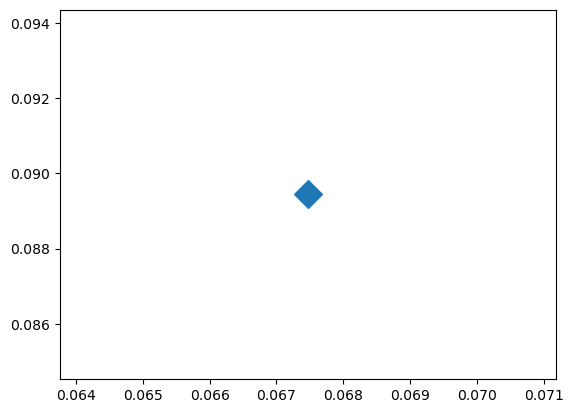

In [40]:
plt.scatter(
    max_sharpe_port["Volatility"],
    max_sharpe_port["Return"],
    marker="D",
    s=200,
    label="Max Sharpe Portfolio"
)